In [2]:
import numpy as np


# Perceptron sólo puede converger si la data es linealmente separable. De lo contrario
# seguirá updateando para siempre, a menos que se imponga un límite de épocas/iteraciones.
class Perceptron(object):

    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        # ojo. se usa la primera columna de w_ [:,0] para guardar los errores.
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                # abajo se guarda el peso.
                self.w_[1:] += update * xi
                # abajo se guarda el error.
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd

df = pd.read_csv('datasets/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df[95:100]

,0,1,2,3,4
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


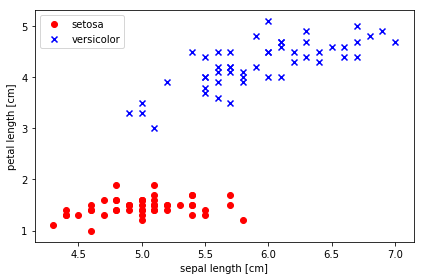

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Elige las primeras 100 filas de la data, y la quinta columna o clase de la muestra.
# Las filas corresponden a Iris-Setosa (primeras 50 filas), e Iris-versicolor (próximas 50 filas).
# Se eligen estas dos clases y asigna -1 a Iris-setosa y -1 a Iris-versicolor.
# Array de una dimensión con la clase real o ground-truth que usará el perceptron.
# (Se usa en la próxima cell.)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Elige la primera y tecera columna de las 100 primeras filas de la data.
# Corresponde a "sepal length" y "petal length".
X = df.iloc[0:100, [0, 2]].values

# De la matriz X con el "sepal length" y ""petal length" de los 100 primeros items de la data,
# donde las primeras 50 filas corresponden a iris-setosa, y las siguientes 50 a iris-versicolor,
# muestra scatter plot donde el eje x e y son "sepal length" y "petal length" respectivamente,
# e iris-setosa se muestra en rojo mientras iris-versicolor es azul.
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

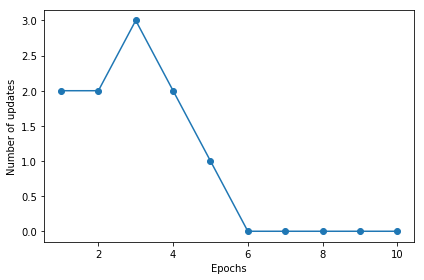

In [6]:
# instanciar y entrenar perceptron
ppn = Perceptron(learning_rate=0.1, n_iterations=10)
ppn.fit(X, y)

# Graficar errores de mala clasificación (éje y) por época (éje x).
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
plt.show()

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

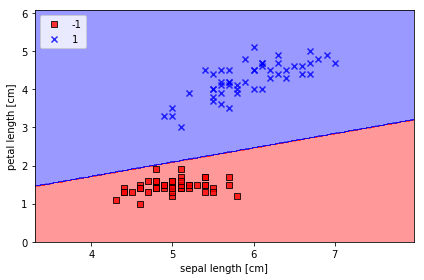

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()